# Latihan


Pada latihan ini kalian akan hands-on bersama instruktur atau mentor kalian untuk membuat pemodelan prediktif untuk kasus regresi dan klasifikasi. Jadi, instruktur dan student akan mencoba melengkapi proses pembuatan machine learning dari setiap kasus berikut.
- **Kasus Regresi**: Prediksi gaji atau salary karyawan Menggunakan Linear Regression dan Decision Tree Regressor. Gunakan [Salary Dataset - Kaggle](https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression) , pada dataset tersebut hanya terdapat 3 kolom.
- **Kasus Klasifikasi**: Loan Status Prediction. Gunakan [Loan Dataset - Kaggle](https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction)

# Kasus - 1 : Prediksi Salary Karyawan.

Pada kasus ini kalian akan mencoba melakukan prediksi sederhana menggunakan Linear Regression dan Decision Tree. Metrik Evaluasi model yang digunakan adalah MAE dan MSE. Berdasarkan Metrik tersebut berikan kesimpulan model mana yang terbaik.

> **Catatan**: Untuk menghemat waktu, lengkapi hanya pada bagian pemodelan Machine Learningnya saja.

## Import Libraries

In [ ]:
# Impor library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Data Loading

In [ ]:
# Lakukan Data Loading
!mkdir ~/.kaggle

In [ ]:
!cp '/content/kaggle.json' ~/.kaggle

In [ ]:
!kaggle datasets download -d abhishek14398/salary-dataset-simple-linear-regression

  0% 0.00/457 [00:00<?, ?B/s]
100% 457/457 [00:00<00:00, 649kB/s]


In [ ]:
!unzip /content/salary-dataset-simple-linear-regression.zip

Archive:  /content/salary-dataset-simple-linear-regression.zip
  inflating: Salary_dataset.csv      


In [ ]:
df= pd.read_csv('/content/Salary_dataset.csv')
df.shape

(30, 3)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [ ]:
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [ ]:
df= df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


## EDA (Exploratory Data Analysis)

Untuk menghemat waktu, pada bagian kita hanya melakukan explorasi sederhana untuk cek ditribusi data dan korelasi antara Salary dan YearsExperience.

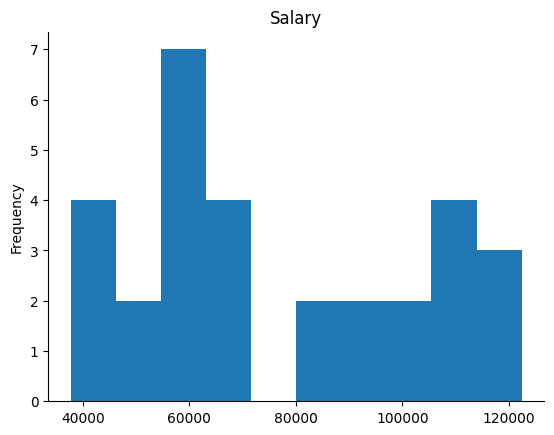

In [ ]:
df['Salary'].plot(kind='hist', bins=10, title='Salary')
plt.gca().spines[['top', 'right',]].set_visible(False)

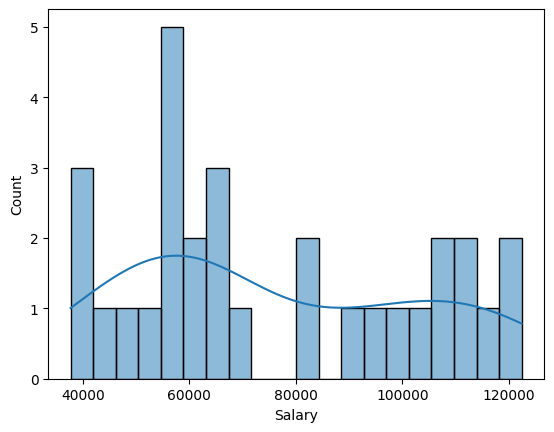

In [ ]:
sns.histplot(df, x='Salary', bins=20, kde=True); #Menggunakan seaborn

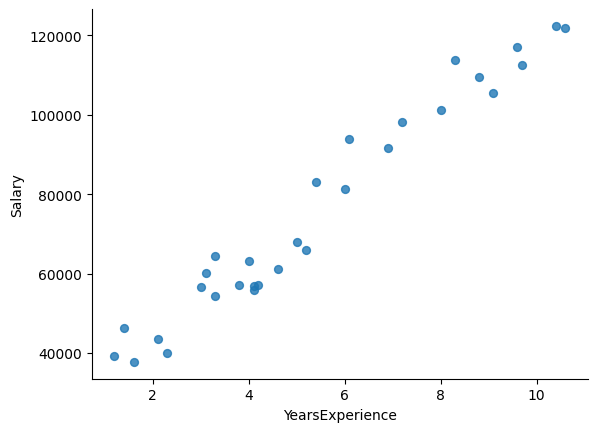

In [ ]:
# Cek kolerasi atau lakukan visualisasi dengan scatterplot
df.plot(kind='scatter', x='YearsExperience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

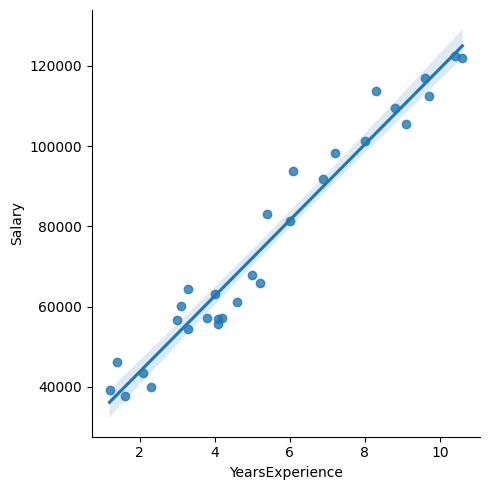

In [ ]:
sns.lmplot(df, x='YearsExperience', y='Salary');

## Data Preprocessing

In [ ]:
# lakukan splitting data
X= df['YearsExperience'] #fitur
y=df['Salary'] #target

X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(24,)

Karena kita hanya memiliki satu fitur dalam bentuk Series (1 dimensi), sedangkan untuk melakukan scaling dengan StandardScaler kita membutuhkan fitur 2 dimensi, maka kita butuh melakukan reshape agar menjadi 2 dimensi.

In [ ]:
# Mengonversi Series menjadi array numpy
X_train = X_train.values
X_test = X_test.values

# Reshape array
X_train_reshape = X_train.reshape(-1, 1)
X_test_reshape = X_test.reshape(-1, 1)

In [ ]:
X_train_reshape.shape

(24, 1)

In [ ]:
# lakukan scaling
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train_reshape)
X_test_scaled= sc.transform(X_test_reshape)

## Pemodelan Machine Learning


Bandingkan Hasil pemodelan Linear Regression dan Decision Tree Regressor menggunakan MAE dan MSE, model mana yang tebaik dan jelaskan apakah Model kalian Overfitting atau Underfitting?

### LinReg

In [ ]:
lin_reg= LinearRegression()
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
# Lengkapi syntax disini untuk prediksi

In [ ]:
# Lengkapi syntax disini untuk evaluasi

### Decision Tree

In [ ]:
model_dt= DecisionTreeRegressor(max_depth=3, random_state=42)
model_dt.fit(X_train_scaled, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
# Lengkapi syntax disini untuk prediksi

In [ ]:
# Lengkapi syntax disini untuk evaluasi

# Kasus - 2 : Loan Status Prediction

Pada kasus ini kalian akan mencoba melakukan prediksi Loan Status menggunakan Logistic Regression dan Decision Tree. Metrik Evaluasi model yang akan kalian coba adalah Accuracy, Recall, Precission dan pengecekan dengan classsification report. Berdasarkan Metrik tersebut berikan kesimpulan model mana yang terbaik.

> **Catatan**: Untuk menghemat waktu, anda dapat melakukan EDA seperti pada materi sebelumnya: [EDA - Statistika Deskriptif](https://colab.research.google.com/drive/1xJ4BNWPB_q3nyDTu-k2dXU9sIdUzm6bJ?usp=sharing)

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score

## Data Loading

In [ ]:
!kaggle datasets download -d bhavikjikadara/loan-status-prediction

  0% 0.00/5.21k [00:00<?, ?B/s]
100% 5.21k/5.21k [00:00<00:00, 6.74MB/s]


In [ ]:
!unzip -q /content/loan-status-prediction.zip

In [ ]:
df= pd.read_csv('/content/loan_data.csv')

In [ ]:
#pengecekan tipe data dan data yang hilang
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [ ]:
#Pengecekan Data yang hilang
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

In [ ]:
#drop baris yang memiliki missing values pada Self_Employed dan Credit_History
df= df.dropna(subset=['Self_Employed','Credit_History','Gender'])

In [ ]:
#isi data yang hilang dengan modus
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     10
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

## EDA

Lakukan EDA basic atau gunakan seperti materi ini: [EDA - Statistika Deskriptif](https://colab.research.google.com/drive/1xJ4BNWPB_q3nyDTu-k2dXU9sIdUzm6bJ?usp=sharing)

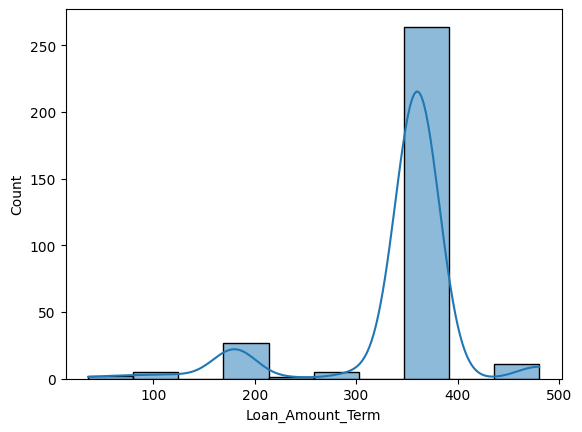

In [ ]:
# lakukan EDA basic atau gunakan seperti materi
sns.histplot(df,x='Loan_Amount_Term', kde=True);

In [ ]:
#isi data yang hilang dengan modus
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

In [ ]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [ ]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,325.000000,325.000000,325.000000,325.000000,325.000000
mean,3614.295385,1260.793600,104.649231,341.981538,0.836923
std,1461.056832,2472.807284,29.008620,67.591088,0.370006
min,150.000000,0.000000,9.000000,36.000000,0.000000
25%,2600.000000,0.000000,89.000000,360.000000,1.000000
50%,3333.000000,800.000000,110.000000,360.000000,1.000000
75%,4333.000000,1929.000000,128.000000,360.000000,1.000000
max,9703.000000,33837.000000,150.000000,480.000000,1.000000


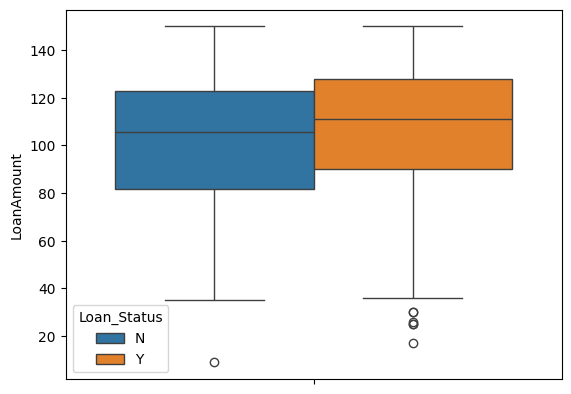

In [ ]:
sns.boxplot(df, orient='v', y='LoanAmount', hue='Loan_Status');

In [ ]:
df['Loan_Amount_Term'].describe()

count    325.000000
mean     341.981538
std       67.591088
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [ ]:
df['Education'].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

## Data Preprocessing

- Lakukan Encodingan pada data bertipe `Object` atau `string`
- Lakukan juga scaling untuk data numerikal

In [ ]:
#lengkapi bersama instruktur

## Pemodelan Machine Learning

Bandingkan Hasil pemodelan Logistic Regression dan Decision Tree. Model mana yang tebaik dan jelaskan apakah Model kalian Overfitting atau Underfitting?

In [ ]:
#lengkapi bersama instruktur